In [2]:
import torch 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import csv 


In [4]:
wine_path = r"C:\Users\nq9093\CodeSpace\DeepLearningAI\DeepLearning\PyTorchBasics\repo\data\p1ch4\tabular-wine\winequality-white.csv"
wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=";", skiprows=1)
col_list = next(csv.reader(open(wine_path), delimiter=';'))

In [5]:
wineq_numpy, col_list 

(array([[ 7.  ,  0.27,  0.36, ...,  0.45,  8.8 ,  6.  ],
        [ 6.3 ,  0.3 ,  0.34, ...,  0.49,  9.5 ,  6.  ],
        [ 8.1 ,  0.28,  0.4 , ...,  0.44, 10.1 ,  6.  ],
        ...,
        [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
        [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
        [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]], dtype=float32),
 ['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol',
  'quality'])

In [6]:
wineq = torch.from_numpy(wineq_numpy)
wineq.shape, wineq.dtype

(torch.Size([4898, 12]), torch.float32)

In [7]:
data = wineq[:, :-1]
data, data.shape

(tensor([[ 7.0000,  0.2700,  0.3600,  ...,  3.0000,  0.4500,  8.8000],
         [ 6.3000,  0.3000,  0.3400,  ...,  3.3000,  0.4900,  9.5000],
         [ 8.1000,  0.2800,  0.4000,  ...,  3.2600,  0.4400, 10.1000],
         ...,
         [ 6.5000,  0.2400,  0.1900,  ...,  2.9900,  0.4600,  9.4000],
         [ 5.5000,  0.2900,  0.3000,  ...,  3.3400,  0.3800, 12.8000],
         [ 6.0000,  0.2100,  0.3800,  ...,  3.2600,  0.3200, 11.8000]]),
 torch.Size([4898, 11]))

In [8]:
target = wineq[:, -1].long()
target, target.shape

(tensor([6, 6, 6,  ..., 6, 7, 6]), torch.Size([4898]))

In [12]:
target_onehot = torch.zeros(target.shape[0], 10)
target_onehot.scatter_(1, target.unsqueeze(1), 1.0)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [20]:
target_onehot[0, :], target[0]
target_unsqueezed = target.unsqueeze(1)
target_unsqueezed


tensor([[6],
        [6],
        [6],
        ...,
        [6],
        [7],
        [6]])

In [26]:
data_mean = torch.mean(data, dim=0)
data_mean

tensor([6.8548e+00, 2.7824e-01, 3.3419e-01, 6.3914e+00, 4.5772e-02, 3.5308e+01,
        1.3836e+02, 9.9403e-01, 3.1883e+00, 4.8985e-01, 1.0514e+01])

In [27]:
data_var = torch.var(data, dim=0)
data_var

tensor([7.1211e-01, 1.0160e-02, 1.4646e-02, 2.5726e+01, 4.7733e-04, 2.8924e+02,
        1.8061e+03, 8.9455e-06, 2.2801e-02, 1.3025e-02, 1.5144e+00])

In [28]:
data_normalized = (data - data_mean) / torch.sqrt(data_var)


In [32]:
bad_indexes = target <= 3
bad_indexes.shape, bad_indexes.dtype, bad_indexes.sum()

(torch.Size([4898]), torch.bool, tensor(20))

In [33]:
bad_data = data[bad_indexes]
bad_data.shape

torch.Size([20, 11])

In [34]:
bad_data = data[target <= 3]
mid_data = data[(target > 3) & (target < 7)]
good_data = data[target >= 7]

bad_mean = torch.mean(bad_data, dim=0)
mid_mean = torch.mean(mid_data, dim=0)
good_mean = torch.mean(good_data, dim=0)

In [36]:
bad_data.shape, mid_data.shape, good_data.shape


(torch.Size([20, 11]), torch.Size([3818, 11]), torch.Size([1060, 11]))

In [37]:
bad_data.shape[0] + mid_data.shape[0] + good_data.shape[0] == data.shape[0]

True

In [39]:
bad_mean.shape, mid_mean.shape, good_mean.shape

(torch.Size([11]), torch.Size([11]), torch.Size([11]))

In [40]:
for i, args in enumerate(zip(col_list, bad_mean, mid_mean, good_mean)): 
    print('{:2} {:20} {:6.2f} {:6.2f} {:6.2f}'.format(i, *args))

 0 fixed acidity          7.60   6.89   6.73
 1 volatile acidity       0.33   0.28   0.27
 2 citric acid            0.34   0.34   0.33
 3 residual sugar         6.39   6.71   5.26
 4 chlorides              0.05   0.05   0.04
 5 free sulfur dioxide   53.33  35.42  34.55
 6 total sulfur dioxide 170.60 141.83 125.25
 7 density                0.99   0.99   0.99
 8 pH                     3.19   3.18   3.22
 9 sulphates              0.47   0.49   0.50
10 alcohol               10.34  10.26  11.42


In [42]:
total_sulfur_threshold = 141.83
total_sulfur_data = data[:, 6]
predicted_indexes = torch.lt(total_sulfur_data, total_sulfur_threshold)
predicted_indexes.shape, predicted_indexes.dtype, predicted_indexes.sum()

(torch.Size([4898]), torch.bool, tensor(2727))

In [43]:
actual_indexes = target > 5
actual_indexes.shape, actual_indexes.dtype, actual_indexes.sum()

(torch.Size([4898]), torch.bool, tensor(3258))

In [44]:
n_matches = torch.sum(actual_indexes & predicted_indexes).item()
n_predicted = torch.sum(predicted_indexes).item()
n_actual = torch.sum(actual_indexes).item()
n_matches, n_matches / n_predicted, n_matches / n_actual

(2018, 0.74000733406674, 0.6193984039287906)

In [50]:
bike_path = r"C:\Users\nq9093\CodeSpace\DeepLearningAI\DeepLearning\PyTorchBasics\repo\data\p1ch4\bike-sharing-dataset\hour-fixed.csv"
bikes_numpy = np.loadtxt(bike_path, dtype=np.float32, delimiter=",", skiprows=1, converters={1: lambda x: float(x[8:10])})

In [52]:
bikes = torch.from_numpy(bikes_numpy)
bikes.shape, bikes.stride()

(torch.Size([17520, 17]), (17, 1))

In [55]:
daily_bikes = bikes.view(-1, 24, bikes.shape[1])
daily_bikes.shape, daily_bikes.stride()

(torch.Size([730, 24, 17]), (408, 17, 1))

In [112]:
daily_bikes = daily_bikes.transpose(1, 2)
daily_bikes.shape, daily_bikes.stride()

(torch.Size([730, 17, 24]), (408, 1, 17))

In [94]:
first_day = bikes[:24].long()
weather_onehot = torch.zeros(first_day.shape[0], 4)
first_day[:,9]
weather_onehot.scatter_(1, first_day[:,9].unsqueeze(1).long()-1, 1.0)
print(weather_onehot)
weather_onehot.shape, weather_onehot.stride()

tensor([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.]])


(torch.Size([24, 4]), (4, 1))

In [99]:
torch.cat((bikes[:24], weather_onehot), 1)[:1]

tensor([[ 1.0000,  1.0000,  1.0000,  0.0000,  1.0000,  0.0000,  0.0000,  6.0000,
          0.0000,  1.0000,  0.2400,  0.2879,  0.8100,  0.0000,  3.0000, 13.0000,
         16.0000,  1.0000,  0.0000,  0.0000,  0.0000]])

In [114]:
daily_weather_onehot = torch.zeros(daily_bikes.shape[0], 4, daily_bikes.shape[2])
daily_weather_onehot.shape, daily_weather_onehot.stride()
daily_weather_onehot.scatter_(1, daily_bikes[:,9,:].long().unsqueeze(1)-1, 1.0)
daily_weather_onehot.shape

torch.Size([730, 4, 24])

In [115]:
daily_bikes = torch.cat((daily_bikes, daily_weather_onehot), dim=1)

In [118]:
daily_bikes[:, 9, :] = (daily_bikes[:, 9, :] - 1.0) / 3.0

In [120]:
daily_bikes[0, :, 0]

tensor([ 1.0000,  1.0000,  1.0000,  0.0000,  1.0000,  0.0000,  0.0000,  6.0000,
         0.0000,  0.0000,  0.2400,  0.2879,  0.8100,  0.0000,  3.0000, 13.0000,
        16.0000,  1.0000,  0.0000,  0.0000,  0.0000])

In [121]:
temp = daily_bikes[:, 10, :]
temp_min = torch.min(temp)
temp_max = torch.max(temp)
daily_bikes[:, 10, :] = (daily_bikes[:, 10, :] - temp_min) / (temp_max - temp_min)

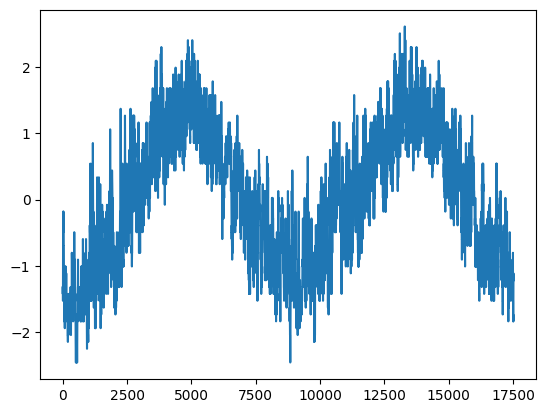

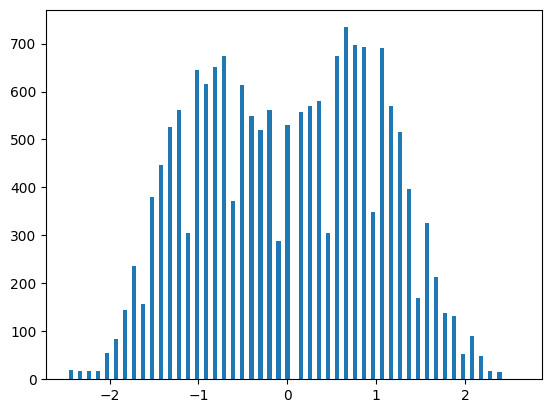

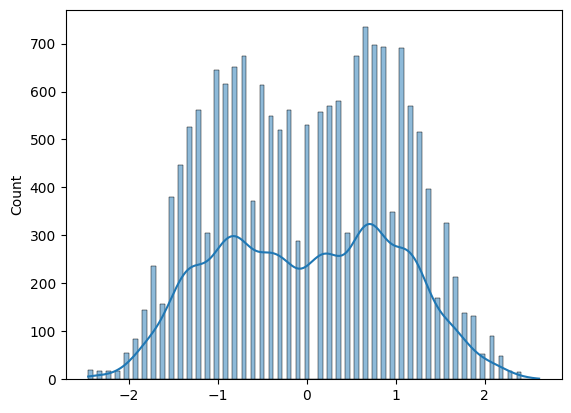

In [127]:
import seaborn as sns

temp = daily_bikes[:, 10, :]
daily_bikes[:, 10, :] = (daily_bikes[:, 10, :] - torch.mean(temp)) / torch.std(temp)
plt.plot(temp.flatten())
plt.show()
plt.hist(temp.flatten(), bins=100)
plt.show()
sns.histplot(temp.flatten(), bins=100, kde=True)
plt.show()

In [128]:
with open("pride_and_prejudice.txt", encoding="utf-8") as f: 
    text = f.read()


In [137]:
lines = text.split('\n')
line = lines[209]
line

'fancied herself nervous. The business of her life was to get her'

In [139]:
letter_t = torch.zeros(len(line), 128)
letter_t.shape

torch.Size([64, 128])

In [141]:
for i, letter in enumerate(line.lower().strip()): 
    letter_index = ord(letter) if ord(letter) < 128 else 0
    letter_t[i][letter_index] = 1

In [159]:
def clean_words(input_str):
    punctuation = '.,;:"!?”“_-\'()[]{}&@#$%^+=<>/`~*|'
    word_list = input_str.lower().replace('\n', ' ').split()
    word_list = [word.strip(punctuation) for word in word_list]
    return word_list

words_in_line = clean_words(line)
line, words_in_line

('fancied herself nervous. The business of her life was to get her',
 ['fancied',
  'herself',
  'nervous',
  'the',
  'business',
  'of',
  'her',
  'life',
  'was',
  'to',
  'get',
  'her'])

In [160]:
word_list = sorted(set(clean_words(text)))


In [162]:
word_list, len(word_list)

(['',
  '1',
  '1.a',
  '1.b',
  '1.c',
  '1.d',
  '1.e',
  '1.e.1',
  '1.e.2',
  '1.e.3',
  '1.e.4',
  '1.e.5',
  '1.e.6',
  '1.e.7',
  '1.e.8',
  '1.e.9',
  '1.f',
  '1.f.1',
  '1.f.2',
  '1.f.3',
  '1.f.4',
  '1.f.5',
  '1.f.6',
  '1500',
  '15th',
  '1813',
  '1815',
  '18th',
  '1^{st',
  '2',
  '20',
  '2001',
  '2013',
  '26',
  '26th',
  '3',
  '30',
  '4',
  '42671',
  '42671-h.htm',
  '42671-h.zip',
  '5',
  '5,000',
  '50',
  '501(c)(3',
  '596-1887',
  '6',
  '60',
  '64-6221541',
  '72',
  '801',
  '809',
  '84116',
  '9',
  '90',
  'a',
  'a-year',
  'abatement',
  'abhorrence',
  'abhorrent',
  'abide',
  'abiding',
  'abilities',
  'able',
  'ablution',
  'abode',
  'abominable',
  'abominable!--i',
  'abominably',
  'abominate',
  'abound',
  'about',
  'abouts',
  'above',
  'above-mentioned',
  'abroad',
  'abrupt',
  'abruptly',
  'abruptness',
  'absence',
  'absent',
  'absolute',
  'absolutely',
  'absurd',
  'absurd.--i',
  'absurdities',
  'absurdity',
  'abund

In [163]:
word2index_dict = {word: i for (i, word) in enumerate(word_list)}

In [164]:
len(word2index_dict), word2index_dict['impossible']

(7377, 3389)

In [170]:
word_t = torch.zeros(len(words_in_line), len(word2index_dict))
for i, word in enumerate(words_in_line): 
    word_index = word2index_dict[word]
    word_t[i][word_index] = 1
    print('{:2} {:4} {}'.format(i, word_index, word))

print(word_t.shape)

 0 2542 fancied
 1 3187 herself
 2 4392 nervous
 3 6535 the
 4  920 business
 5 4534 of
 6 3166 her
 7 3924 life
 8 7084 was
 9 6615 to
10 2891 get
11 3166 her
torch.Size([12, 7377])


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])